In [ ]:
import pandas as pd
from matplotlib import  pyplot as plt

import numpy as np
df = pd.read_csv('/content/evaporation.csv')


In [ ]:
# Drop rows with any missing values
df_dropped_rows = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped_rows)


DataFrame after dropping rows with missing values:
               State                 District       Date    Year  Month  \
93    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
94    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
95    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
96    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
97    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
...              ...                      ...        ...     ...    ...   
2194           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2195           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2196           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2197           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2198           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   

      Avg_etlvl_at15cm     Agency_name  
93    

In [ ]:
df.columns

Index(['State', 'District', 'Date', 'Year', 'Month', 'Avg_etlvl_at15cm',
       'Agency_name', 'Equal_Width_Bins', 'Equal_Frequency_Bins',
       'Custom_Bins'],
      dtype='object')

In [ ]:
df.dtypes

,0
State,object
District,object
Date,object
Year,float64
Month,float64
Avg_etlvl_at15cm,float64
Agency_name,object


In [ ]:
# Imputation:

# Fill missing values with mean for each column
df_mean_imputed = df.fillna(df.select_dtypes(include=np.number).mean()) # Calculate the mean only for numeric columns
print("\nDataFrame after mean imputation:")
print(df_mean_imputed)

# Fill missing values with median for each column
df_median_imputed = df.fillna(df.select_dtypes(include=np.number).median()) # Calculate the median only for numeric columns
print("\nDataFrame after median imputation:")
print(df_median_imputed)


DataFrame after mean imputation:
                   State  District       Date    Year  Month  \
0      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
1      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
2      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
3      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
4      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
...                  ...       ...        ...     ...    ...   
22718                NaN       NaN        NaN  2024.0    3.0   
22719                NaN       NaN        NaN  2024.0    3.0   
22720                NaN       NaN        NaN  2024.0    3.0   
22721                NaN       NaN        NaN  2024.0    3.0   
22722                NaN       NaN        NaN  2024.0    3.0   

       Avg_etlvl_at15cm     Agency_name  
0              0.914428  NRSC VIC MODEL  
1              0.914428  NRSC VIC MODEL  
2              0.914428  NRSC VIC MODEL  
3              0.914428  NRSC

In [ ]:
# Flagging Missing Values:

# Create a new column to flag missing values
df_flagged = df.copy()
df_flagged['Missing_Flag'] = df_flagged.isnull().any(axis=1)
print("\nDataFrame with flagged missing values:")
print(df_flagged)


DataFrame with flagged missing values:
                   State  District       Date    Year  Month  \
0      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
1      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
2      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
3      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
4      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
...                  ...       ...        ...     ...    ...   
22718                NaN       NaN        NaN     NaN    NaN   
22719                NaN       NaN        NaN     NaN    NaN   
22720                NaN       NaN        NaN     NaN    NaN   
22721                NaN       NaN        NaN     NaN    NaN   
22722                NaN       NaN        NaN     NaN    NaN   

       Avg_etlvl_at15cm     Agency_name  Missing_Flag  
0                   NaN  NRSC VIC MODEL          True  
1                   NaN  NRSC VIC MODEL          True  
2                   NaN

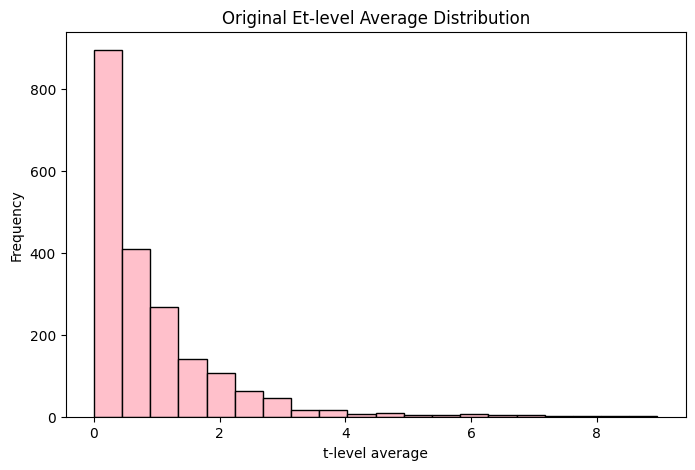

               State                 District       Date    Year  Month  \
93    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
94    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
95    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
96    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
97    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
...              ...                      ...        ...     ...    ...   
2194           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2195           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2196           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2197           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2198           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   

      Avg_etlvl_at15cm     Agency_name  
93            0.120625  NRSC VIC MODEL  
94            0.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualize the Evaporation averages before handling outliers
plt.figure(figsize=(8, 5))
plt.hist(df['Avg_etlvl_at15cm'], bins=20, edgecolor='black',color='pink')
plt.title('Original Et-level Average Distribution')
plt.xlabel('t-level average')
plt.ylabel('Frequency')
plt.show()

# Handling outliers using the Interquartile Range (IQR) method
Q1 = df['Avg_etlvl_at15cm'].quantile(0.25)
Q3 = df['Avg_etlvl_at15cm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers based on the IQR method
df_filtered = df[(df['Avg_etlvl_at15cm'] >= lower_bound) & (df['Avg_etlvl_at15cm'] <= upper_bound)]

# Display the filtered DataFrame
print(df_filtered)


In [ ]:
import pandas as pd

# Equal width binning
num_bins = 3
bin_labels = ['Low', 'Medium', 'High']

# Convert the column to numeric type and handle missing values
df['Avg_etlvl_at15cm'] = pd.to_numeric(df['Avg_etlvl_at15cm'], errors='coerce') # Convert to numeric, replace invalid values with NaN
df['Avg_etlvl_at15cm'] = df['Avg_etlvl_at15cm'].fillna(df['Avg_etlvl_at15cm'].mean()) # Fill NaN with the mean

df['Equal_Width_Bins'] = pd.cut(df['Avg_etlvl_at15cm'], bins=num_bins, labels=bin_labels)

print("\nDataFrame after Equal Width Binning:")
print(df)


DataFrame after Equal Width Binning:
                   State  District       Date    Year  Month  \
0      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
1      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
2      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
3      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
4      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
...                  ...       ...        ...     ...    ...   
22718                NaN       NaN        NaN     NaN    NaN   
22719                NaN       NaN        NaN     NaN    NaN   
22720                NaN       NaN        NaN     NaN    NaN   
22721                NaN       NaN        NaN     NaN    NaN   
22722                NaN       NaN        NaN     NaN    NaN   

       Avg_etlvl_at15cm     Agency_name Equal_Width_Bins  
0              0.914428  NRSC VIC MODEL              Low  
1              0.914428  NRSC VIC MODEL              Low  
2              0

In [ ]:
# Equal frequency binning
num_bins = 3
# Use one less label than the number of bins (num_bins)
bin_labels = ['Low', 'Medium','High']
df['Equal_Frequency_Bins'] = pd.qcut(df['Avg_etlvl_at15cm'], q=num_bins, labels=bin_labels, duplicates='drop')
print("\nDataFrame after Equal Frequency Binning:")
print(df)


DataFrame after Equal Frequency Binning:
                   State  District       Date    Year  Month  \
0      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
1      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
2      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
3      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
4      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
...                  ...       ...        ...     ...    ...   
22718                NaN       NaN        NaN     NaN    NaN   
22719                NaN       NaN        NaN     NaN    NaN   
22720                NaN       NaN        NaN     NaN    NaN   
22721                NaN       NaN        NaN     NaN    NaN   
22722                NaN       NaN        NaN     NaN    NaN   

       Avg_etlvl_at15cm     Agency_name Equal_Frequency_Bins  
0                   NaN  NRSC VIC MODEL                  NaN  
1                   NaN  NRSC VIC MODEL                  NaN  


In [ ]:
import pandas as pd

# Custom binning based on domain knowledge
bins = [0, 20, 40, 60]
bin_labels = ['Low', 'Medium', 'High']
df['Custom_Bins'] = pd.cut(df['Avg_etlvl_at15cm'], bins=bins, labels=bin_labels) # Changed 'Et-level_avg' to 'Avg_etlvl_at15cm'

print("\nDataFrame after Custom Binning:")
print(df)


DataFrame after Custom Binning:
                   State  District       Date    Year  Month  \
0      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
1      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
2      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
3      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
4      Andaman & Nicobar  Nicobars  3/31/2024  2024.0    3.0   
...                  ...       ...        ...     ...    ...   
22718                NaN       NaN        NaN     NaN    NaN   
22719                NaN       NaN        NaN     NaN    NaN   
22720                NaN       NaN        NaN     NaN    NaN   
22721                NaN       NaN        NaN     NaN    NaN   
22722                NaN       NaN        NaN     NaN    NaN   

       Avg_etlvl_at15cm     Agency_name Equal_Width_Bins Custom_Bins  
0              0.914428  NRSC VIC MODEL              Low         Low  
1              0.914428  NRSC VIC MODEL              Low

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


df['Target'] = df['Avg_etlvl_at15cm'].apply(lambda x: 1 if x > 0.15 else 0)


X = df[['Year', 'Month']]
y = df['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


DataFrame after dropping rows with missing values:
               State                 District       Date    Year  Month  \
93    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
94    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
95    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
96    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
97    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
...              ...                      ...        ...     ...    ...   
2194           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2195           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2196           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2197           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2198           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   

      Avg_etlvl_at15cm     Agency_name  
93    

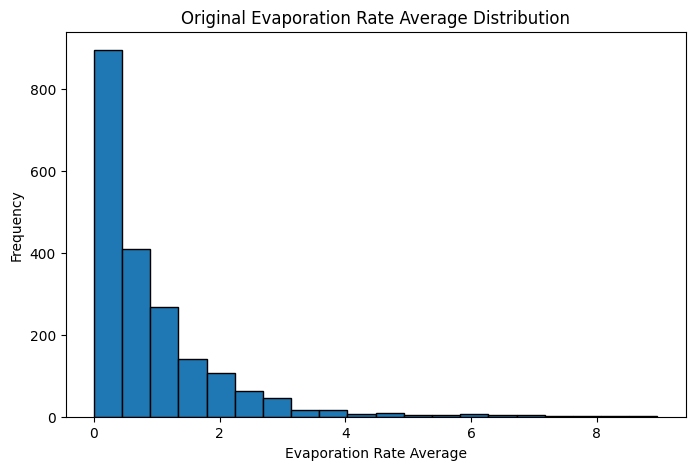

               State                 District       Date    Year  Month  \
93    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
94    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
95    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
96    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
97    Andhra Pradesh                Anantapur  3/31/2024  2024.0    3.0   
...              ...                      ...        ...     ...    ...   
2194           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2195           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2196           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2197           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   
2198           Assam  South Salmara Mancachar  3/29/2024  2024.0    3.0   

      Avg_etlvl_at15cm     Agency_name  
93            0.120625  NRSC VIC MODEL  
94            0.1

ValueError: Bin labels must be one fewer than the number of bin edges

In [ ]:
import pandas as pd
from matplotlib import  pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/evaporation.csv')

# Drop rows with any missing values
df_dropped_rows = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped_rows)
df.dtypes
# Imputation:

# Fill missing values with mean for each column
df_mean_imputed = df.fillna(df.select_dtypes(include=np.number).mean()) # Calculate the mean only for numeric columns
print("\nDataFrame after mean imputation:")
print(df_mean_imputed)

# Fill missing values with median for each column
df_median_imputed = df.fillna(df.select_dtypes(include=np.number).median()) # Calculate the median only for numeric columns
print("\nDataFrame after median imputation:")
print(df_median_imputed)
# Flagging Missing Values:

# Create a new column to flag missing values
df_flagged = df.copy()
df_flagged['Missing_Flag'] = df_flagged.isnull().any(axis=1)
print("\nDataFrame with flagged missing values:")
print(df_flagged)

# Visualize the evaporation rate averages before handling outliers
plt.figure(figsize=(8, 5))
plt.hist(df['Avg_etlvl_at15cm'], bins=20, edgecolor='black')
plt.title('Original Evaporation Rate Average Distribution')
plt.xlabel('Evaporation Rate Average')
plt.ylabel('Frequency')
plt.show()

# Handling outliers using the Interquartile Range (IQR) method
Q1 = df['Avg_etlvl_at15cm'].quantile(0.25)
Q3 = df['Avg_etlvl_at15cm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers based on the IQR method
df_filtered = df[(df['Avg_etlvl_at15cm'] >= lower_bound) & (df['Avg_etlvl_at15cm'] <= upper_bound)]

# Display the filtered DataFrame
print(df_filtered)


# Equal width binning
num_bins = 3
bin_labels = ['Low', 'Medium', 'High']

# Convert the column to numeric type and handle missing values
df['Avg_etlvl_at15cm'] = pd.to_numeric(df['Avg_etlvl_at15cm'], errors='coerce') # Convert to numeric, replace invalid values with NaN
df['Avg_etlvl_at15cm'] = df['Avg_etlvl_at15cm'].fillna(df['Avg_etlvl_at15cm'].mean()) # Fill NaN with the mean

df['Equal_Width_Bins'] = pd.cut(df['Avg_etlvl_at15cm'], bins=num_bins, labels=bin_labels)

print("\nDataFrame after Equal Width Binning:")
print(df)
# Equal frequency binning
num_bins = 3
# Use one less label than the number of bins (num_bins)
bin_labels = ['Low', 'Medium','Hig']
df['Equal_Frequency_Bins'] = pd.qcut(df['Avg_etlvl_at15cm'], q=num_bins, labels=bin_labels, duplicates='drop')
print("\nDataFrame after Equal Frequency Binning:")
print(df)

# Custom binning based on domain knowledge
bins = [0, 20, 40, 60]
bin_labels = ['Low', 'Medium', 'High']
df['Custom_Bins'] = pd.cut(df['Avg_etlvl_at15cm'], bins=bins, labels=bin_labels) # Changed 'Et-level_avg' to 'Avg_etlvl_at15cm'
print("\nDataFrame after Custom Binning:")
print(df)


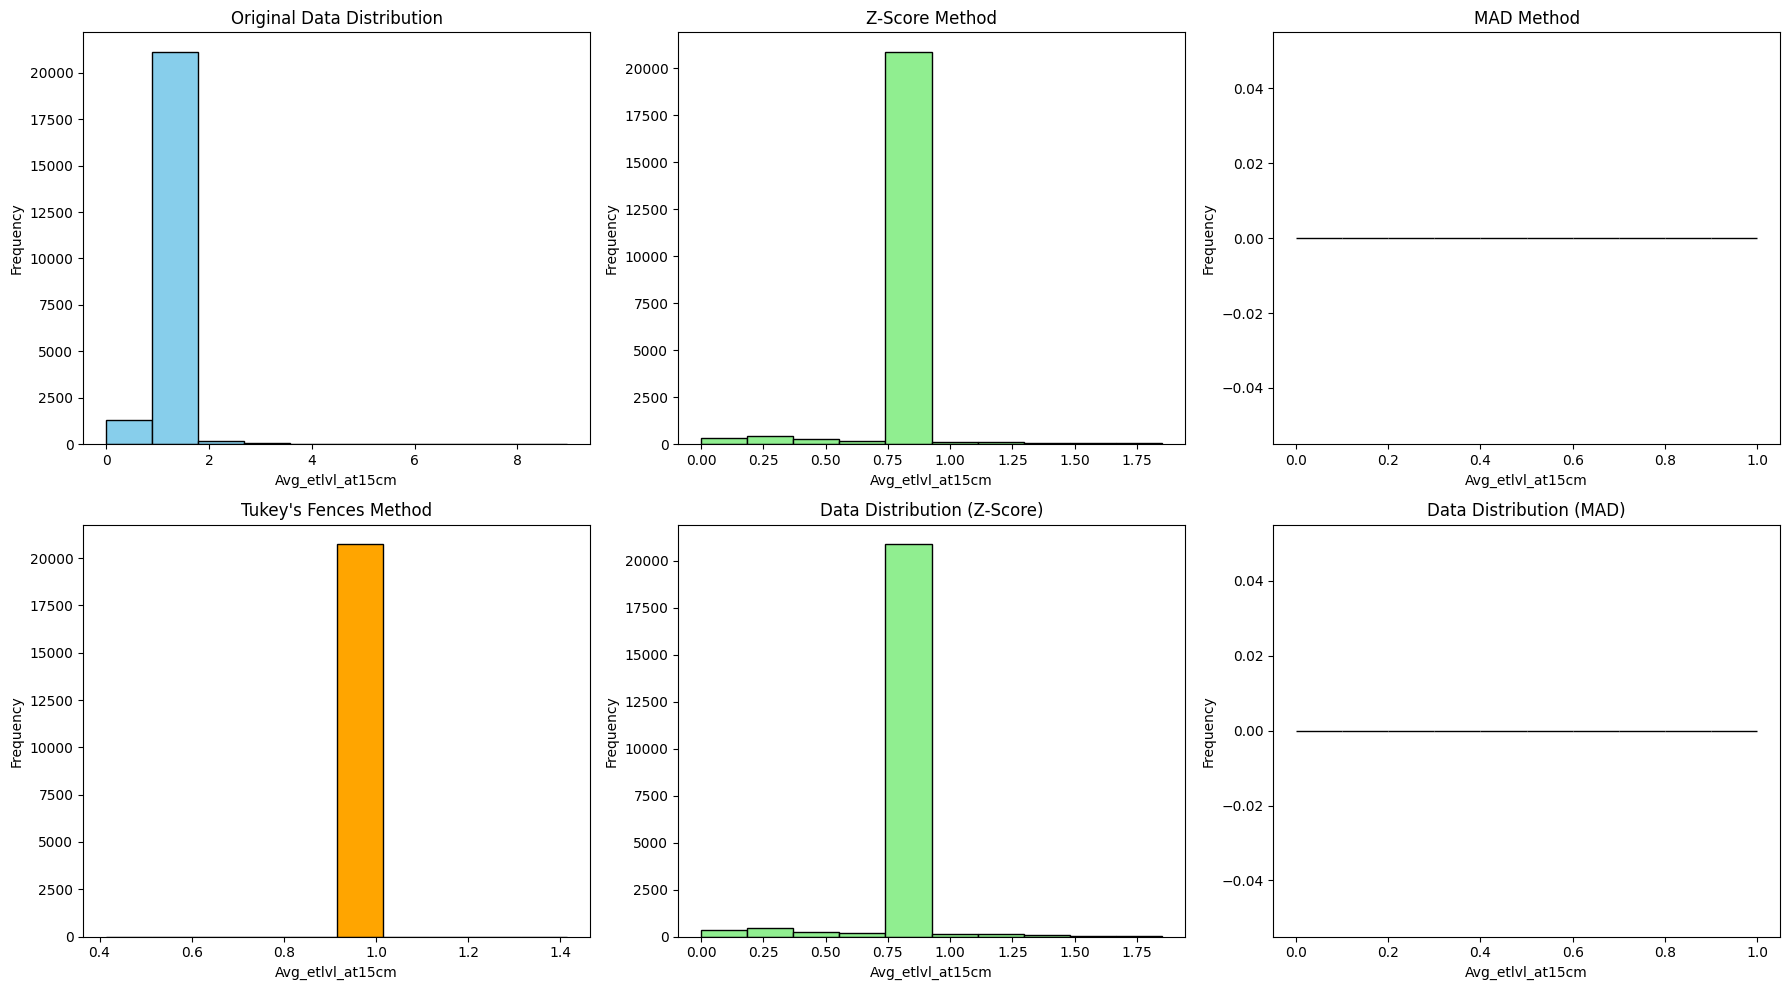

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Plot settings
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Original data distribution
axes[0].hist(df['Avg_etlvl_at15cm'], bins=10, edgecolor='black', color='skyblue')
axes[0].set_title('Original Data Distribution')
axes[0].set_xlabel('Avg_etlvl_at15cm')
axes[0].set_ylabel('Frequency')

# 1. Z-Score Method
z_scores = (df['Avg_etlvl_at15cm'] - df['Avg_etlvl_at15cm'].mean()) / df['Avg_etlvl_at15cm'].std()
df_z_filtered = df[np.abs(z_scores) < 3]  # Retain data within 3 standard deviations
axes[1].hist(df_z_filtered['Avg_etlvl_at15cm'], bins=10, edgecolor='black', color='lightgreen')
axes[1].set_title('Z-Score Method')
axes[1].set_xlabel('Avg_etlvl_at15cm')
axes[1].set_ylabel('Frequency')

# 2. Median Absolute Deviation (MAD) Method
median = df['Avg_etlvl_at15cm'].median()
mad = np.median(np.abs(df['Avg_etlvl_at15cm'] - median))
threshold = 3  # Threshold to identify outliers
df_mad_filtered = df[np.abs(df['Avg_etlvl_at15cm'] - median) / mad < threshold]
axes[2].hist(df_mad_filtered['Avg_etlvl_at15cm'], bins=10, edgecolor='black', color='salmon')
axes[2].set_title('MAD Method')
axes[2].set_xlabel('Avg_etlvl_at15cm')
axes[2].set_ylabel('Frequency')

# 3. Tukey's Fences Method
Q1 = df['Avg_etlvl_at15cm'].quantile(0.25)
Q3 = df['Avg_etlvl_at15cm'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
df_tukey_filtered = df[(df['Avg_etlvl_at15cm'] >= lower_fence) & (df['Avg_etlvl_at15cm'] <= upper_fence)]
axes[3].hist(df_tukey_filtered['Avg_etlvl_at15cm'], bins=10, edgecolor='black', color='orange')
axes[3].set_title("Tukey's Fences Method")
axes[3].set_xlabel('Avg_etlvl_at15cm')
axes[3].set_ylabel('Frequency')

# Filtered data distribution after Z-Score method
axes[4].hist(df_z_filtered['Avg_etlvl_at15cm'], bins=10, edgecolor='black', color='lightgreen')
axes[4].set_title('Data Distribution (Z-Score)')
axes[4].set_xlabel('Avg_etlvl_at15cm')
axes[4].set_ylabel('Frequency')

# Filtered data distribution after MAD method
axes[5].hist(df_mad_filtered['Avg_etlvl_at15cm'], bins=10, edgecolor='black', color='salmon')
axes[5].set_title('Data Distribution (MAD)')
axes[5].set_xlabel('Avg_etlvl_at15cm')
axes[5].set_ylabel('Frequency')

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
df.describe()

,Year,Month,Avg_etlvl_at15cm
count,2199.0,2199.0,22723.000000
mean,2024.0,3.0,0.914428
std,0.0,0.0,0.313227
min,2024.0,3.0,0.000720
25%,2024.0,3.0,0.914428
50%,2024.0,3.0,0.914428
75%,2024.0,3.0,0.914428
max,2024.0,3.0,8.964061


In [ ]:
df.columns

Index(['State', 'District', 'Date', 'Year', 'Month', 'Avg_etlvl_at15cm',
       'Agency_name', 'Equal_Width_Bins'],
      dtype='object')

In [ ]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['State', 'District', 'Month', 'Agency_name'], drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['Avg_etlvl_at15cm', 'Date', 'Year'])  # Exclude target and non-predictive columns
y = df_encoded['Avg_etlvl_at15cm']


In [ ]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['State', 'District', 'Month', 'Agency_name'], drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['Avg_etlvl_at15cm', 'Date', 'Year'])  # Exclude target and non-predictive columns
y = df_encoded['Avg_etlvl_at15cm']

# Remove rows with NaN values in the target variable
df_encoded = df_encoded.dropna(subset=['Avg_etlvl_at15cm'])

# Redefine X and y after removing NaN
X = df_encoded.drop(columns=['Avg_etlvl_at15cm', 'Date', 'Year'])
y = df_encoded['Avg_etlvl_at15cm']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


NameError: name 'train_test_split' is not defined

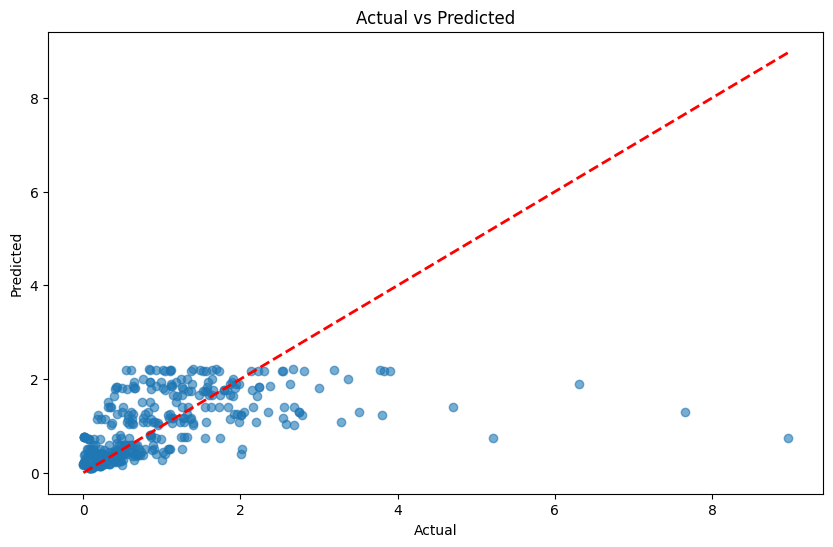

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print mean and standard deviation of the cross-validation scores
print(f'Mean CV MSE: {-cv_scores.mean()}')
print(f'Standard Deviation of CV MSE: {cv_scores.std()}')



Mean CV MSE: 6.701587742944883e+23
Standard Deviation of CV MSE: 1.2076209732527105e+24


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'fit_intercept': [True, False],
    # 'normalize': [True, False]  # Remove or comment out this line
}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'fit_intercept': False}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Ridge Regression': Ridge(),
    'SVR': SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} MSE: {mse}')


Linear Regression MSE: 0.7549140932234106
Random Forest MSE: 0.7546355894554536
Ridge Regression MSE: 0.7483848115593711
SVR MSE: 0.8005459366954024


In [ ]:
# Train the selected model (e.g., the best model from comparison)
best_model = RandomForestRegressor()  # replace with the best model based on comparison
best_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Final Model Mean Squared Error: {mse}')
print(f'Final Model R² Score: {r2}')


Final Model Mean Squared Error: 0.7538022367588427
Final Model R² Score: 0.28766637357826774


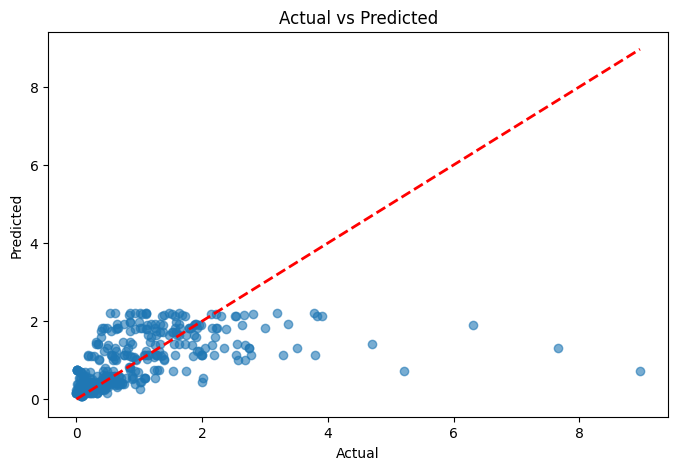

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


df['Target'] = df['Avg_etlvl_at15cm'].apply(lambda x: 1 if x > 0.15 else 0)


X = df[['Year', 'Month']]
y = df['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values